### This case study is related to a consumer finance company which specialises in lending
### various types of loans to urban customers.
### Case study analyses the historical data shared by the consumer finance company and
### draws insights which can help company with 
### their credit appraisal process for new loans. These insights will help company make
### informed decision on whether to approve loan application or not.    


Importing python libraries required for the data analysis.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the data
loan = pd.read_csv(r'C:\Users\pawan\Desktop\AI & ML\loan\loan.csv')

### Understand the Loan dataset

In [3]:
#Looking the data
loan.head(10)
loan.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Start Data Cleanup 

In [30]:
# Check for duplicate rows in dataset based on id column
print(loan.duplicated(subset=None, keep='first').count())
dup=loan[loan.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### There are no duplicate records

In [5]:
# Check for rows and columns with all values null
print('Number of empty Rows:')
print(loan.isnull().all(axis=1).sum())

print('Number of empty Columns:')
print(loan.isnull().all(axis=0).sum())



Number of empty Rows:
0
Number of empty Columns:
54


In [6]:
### There are 54 columns out of 111 which have only null values. We will drop all these 54 columns
loan.dropna(axis=1, how="all", inplace=True)
loan.shape

(39717, 57)

In [8]:
# Checking the columns list of the loan dataset and removing all loans which are current as these are loans currently being
# serviced and they cannot be used to determine the customer payment behaviour.



loan = loan[loan['loan_status'] != 'Current']

loan.shape


(38577, 57)

In [9]:
# Dropping columns which will not provide any meaningful insight to reason for defaulting. These are columns related to 
# behavioural characteristics which are not available at the loan application or having single values across all records or
# have values which can be represented by some other values.

columns_drop_list = ['loan_amnt', 'funded_amnt', 'emp_title', 'url', 'desc', 'pymnt_plan', 'url', 'desc', 'title', 'zip_code', 'initial_list_status', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']

loan.drop(labels = columns_drop_list, axis = 1, inplace = True)
#Print final column list for analysis

print(loan.columns.tolist())
loan.shape


['id', 'member_id', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'policy_code', 'pub_rec_bankruptcies']


(38577, 33)

In [10]:
# Setting up correct data type for important columns
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')


col_list = ['int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[col_list] = loan[col_list].apply(pd.to_numeric)

In [122]:
###

#loan_fd = loan[loan['loan_status'] == 'Fully Paid']
#loan_dft = loan[loan['loan_status'] == 'Charged Off']
#
#print("Full paid loans",loan_fullypaid.shape)

#print("Defaulted loans",loan_defaulted)

#print(loan.columns.tolist())
###

Full paid loans (32950, 57)
Defaulted loans             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1      1077430    1314167       2500         2500           2500.0   
8      1071795    1306957       5600         5600           5600.0   
9      1071570    1306721       5375         5375           5350.0   
12     1064687    1298717       9000         9000           9000.0   
14     1069057    1303503      10000        10000          10000.0   
...        ...        ...        ...          ...              ...   
39667   118823     118026       2500         2500            675.0   
39668   118533     117783       2500         2500            825.0   
39669   118523     118519       6500         6500            225.0   
39678   113179     113093       1000         1000            950.0   
39688   111227     111223      20000        20000           2800.0   

             term int_rate  installment grade sub_grade  ... next_pymnt_d  \
1       60 months   15.27%        59.8

### After Data cleanup we have 38577 rows (fully paid and defaulted loans) and 33 columns for analysis  

## Data Analysis Started

In [11]:
###Univariate analysis of important attributes of the loan
#(loan.purpose.value_counts()*100)/len(loan)
#loan.hist(column = )z

#Checking distributing of loan amount

loan['funded_amnt_inv'].describe()


count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

(39717, 33)

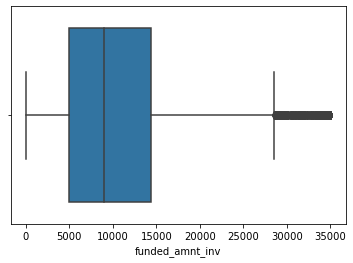

In [37]:
#Box plot for loan amount to identify outliers
sns.boxplot(loan.funded_amnt_inv)
loan.shape

In [12]:
##Inference 
# 1. There is huge gap between 75 percentile and maximum amount. There are outliers as can be seen in box plot.
# 2. 95 percentile of the loans are below 25000 
# 3. Removing the outliers




print(loan[loan["funded_amnt_inv"] <loan['funded_amnt_inv'].quantile(0.95)].shape)

print(loan['funded_amnt_inv'].quantile(0.95))

loan = loan[loan["funded_amnt_inv"] <loan['funded_amnt_inv'].quantile(0.95)]

print(loan.shape)


(36648, 33)
24500.06659
(36648, 33)


135000.0
(34812, 33)


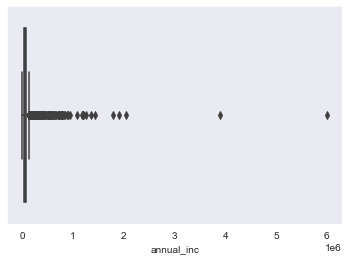

In [28]:
### Removing outliers for annual income by taking on 95 percentile
sns.boxplot(loan.annual_inc)

print(loan['annual_inc'].quantile(0.95))
loan = loan[loan["annual_inc"] <loan['annual_inc'].quantile(0.95)]
print(loan.shape)

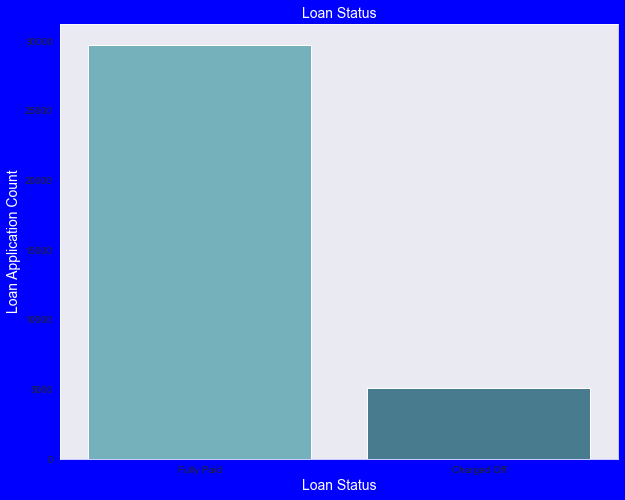

In [29]:
#Plotting distribution of loans by status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan,palette='GnBu_d')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
#s=loan['loan_status'].value_counts()
#for i, v in s.reset_index().iterrows():
#    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')
plt.show()


In [17]:


loan.loan_status.describe()


count          36648
unique             2
top       Fully Paid
freq           31383
Name: loan_status, dtype: object

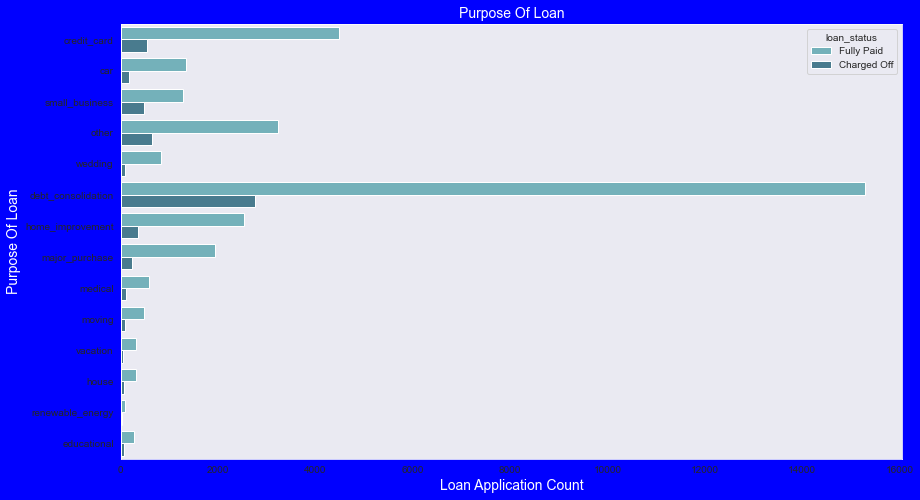

In [167]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=loan,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w') 
#s=loan['purpose'].value_counts()
#for i, v in s.reset_index().iterrows():
#    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

plt.show()


In [ ]:
### Inference1 - Maximum loans are taken for debt consolidation, this means that there are lot of people taking loan
### who are not very good about managing finances and taking loan to consolidate multiple loans. We need to analyze if 
### defaulting percentage for such loan is more not.

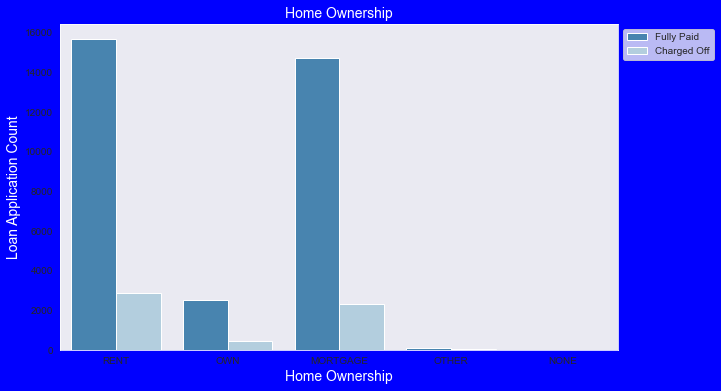

In [169]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loan,hue='loan_status',palette='Blues_r')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()


In [39]:
### Splitting the data into buckets for key financial columns like loan amount, annual income, employment length and ratio to 
### income to loan i.e. dti

loan['funded_amnt_inv_slab'] = pd.cut(loan['funded_amnt_inv'], [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000','25001-30000'])
loan['emp_length_slab'] = pd.cut(loan['emp_length'],[0,5,10], labels = ['0-5','5-10'])
loan['annual_inc_slab'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000, 100000, 140000], labels=['0-20000', '20001-40000', '40001-60000', '60001-80000', '80001-100000','100001-140000'])
loan['dti_slab'] = pd.cut(loan['dti'],[0,5,10,15,20,25,30], labels = ['0-5','6-10','11-15','16-20','21-25','25-30'])

loan.shape

(34812, 37)

In [ ]:
### Added four new columns for the analysis. Now using new added key financial columns we try to analyze the break up
### default against these slabs. 

In [40]:
annual_inc_vs_loan = loan.groupby(['annual_inc_slab', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_vs_loan['Total'] = annual_inc_vs_loan['Charged Off'] + annual_inc_vs_loan['Fully Paid'] 
annual_inc_vs_loan['Chargedoff_Proportion'] = annual_inc_vs_loan['Charged Off'] / annual_inc_vs_loan['Total']
annual_inc_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_inc_slab,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,943,1180,0.200847
1,20001-40000,1513,7001,8514,0.177707
2,40001-60000,1662,9397,11059,0.150285
3,60001-80000,931,6253,7184,0.129594
4,80001-100000,455,3660,4115,0.110571
5,100001-140000,269,2491,2760,0.097464


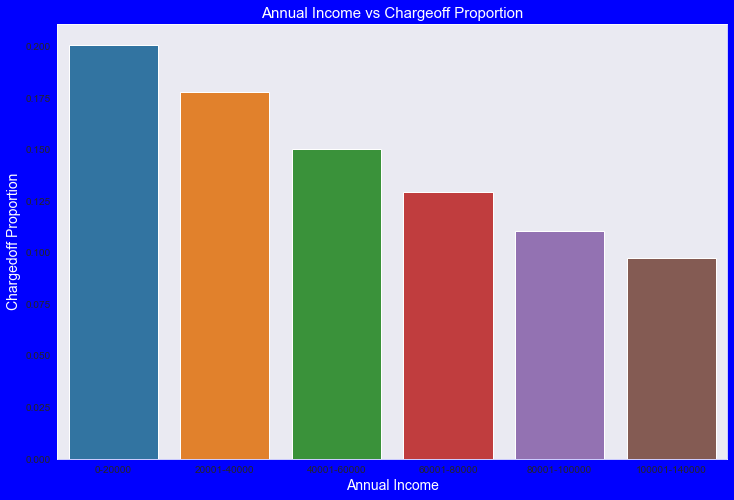

In [42]:
###Inference : As the income level grows charge off percentage drops. So income level should be key factor determining the 
### eligibility of loan.

### Below bar grapg for above observation

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargeoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_slab', y='Chargedoff_Proportion', data=annual_inc_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()



In [53]:

##print(loan.columns.tolist())
employmnt_length_vs_loan = loan.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
employmnt_length_vs_loan['Total'] = employmnt_length_vs_loan['Charged Off'] + employmnt_length_vs_loan['Fully Paid'] 
employmnt_length_vs_loan['Chargedoff_Proportion'] = employmnt_length_vs_loan['Charged Off'] / employmnt_length_vs_loan['Total']
employmnt_length_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



['id', 'member_id', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'policy_code', 'pub_rec_bankruptcies', 'funded_amnt_inv_slab', 'emp_length_slab', 'annual_inc_slab', 'dti_slab']


loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0,217,770,987,0.219858
10,10,1125,6079,7204,0.156163
7,7,236,1328,1564,0.150895
1,1,1025,6115,7140,0.143557
5,5,414,2487,2901,0.142709
6,6,277,1681,1958,0.141471
8,8,178,1083,1261,0.141158
3,3,510,3171,3681,0.138549
4,4,416,2628,3044,0.136662
2,2,526,3444,3970,0.132494


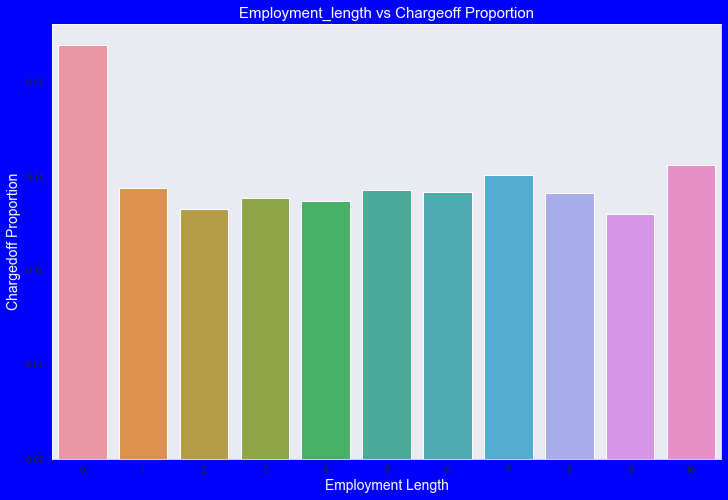

In [52]:
### Below bar grapg for above observation

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Employment_length vs Chargeoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='emp_length', y='Chargedoff_Proportion', data=employmnt_length_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Employment Length',fontsize=14,color='w')
plt.show()

###Inference: Grouping of values on employment length slabs was not giving any clear understandind/observation.
###so plotting on all employment length values we get know that where experience level is zero i.e. no work exp
### has maximum default.

In [54]:
### Lets see if home ownership gives any indication on default

home_ownership_vs_loan = loan.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off'] + home_ownership_vs_loan['Fully Paid'] 
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


###Inference: From below data it is clear that people who own or have mortgage have least charged off proportion. This is
### inline with assumption that people with home ownership will be more financially prudent.


loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,17.0,75.0,92.0,0.184783
4,RENT,2665.0,14821.0,17486.0,0.152408
3,OWN,407.0,2335.0,2742.0,0.148432
0,MORTGAGE,1978.0,12511.0,14489.0,0.136517
1,NONE,0.0,3.0,3.0,0.000000


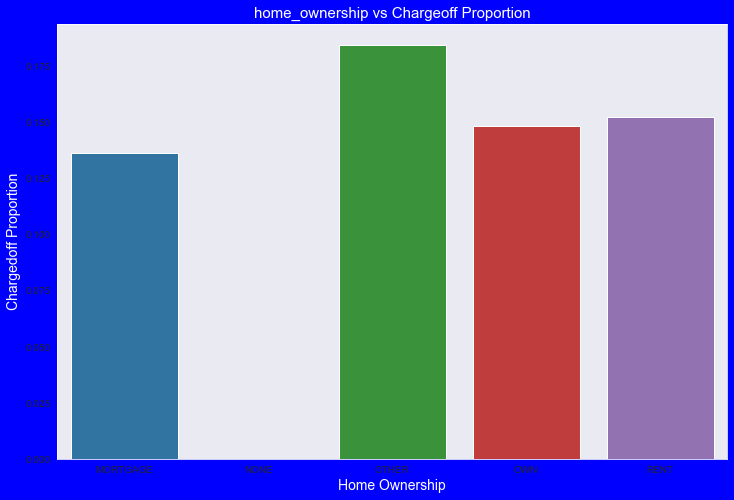

In [55]:
### Let plot graph for home ownership


fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('home_ownership vs Chargeoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
plt.show()


In [58]:
### Lets see if dti gives any indication on default

dti_vs_loan = loan.groupby(['dti_slab', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off'] + dti_vs_loan['Fully Paid'] 
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)






loan_status,dti_slab,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,21-25,1037,5100,6137,0.168975
3,16-20,1248,6798,8046,0.155108
2,11-15,1257,7448,8705,0.144400
5,25-30,81,491,572,0.141608
1,6-10,882,6028,6910,0.127641
0,0-5,534,3739,4273,0.124971


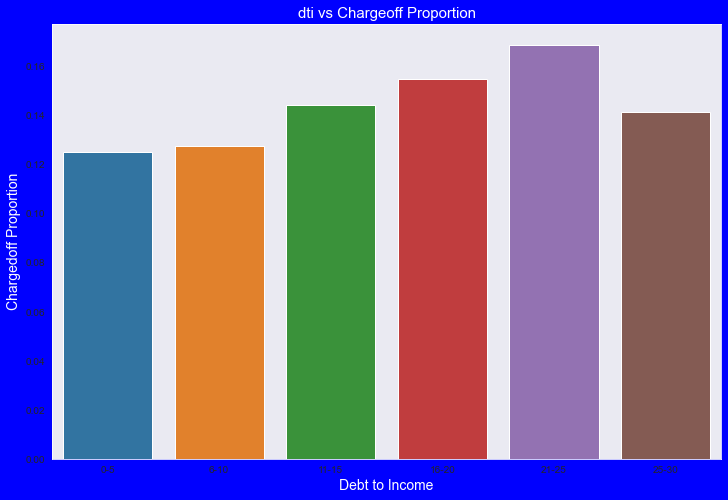

In [60]:
### Plotting graphs for dti vs loan status

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('dti vs Chargeoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='dti_slab', y='Chargedoff_Proportion', data=dti_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Debt to Income',fontsize=14,color='w')
plt.show()


### Inference =  As dti ration increased probability of defaulting on loan increases.

In [61]:
### Lets see if purpose gives any indication on default

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

##Inference - Business loans are most riskier with almost 27 % of loans defaulting

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,407,1075,1482,0.274629
10,renewable_energy,18,75,93,0.193548
3,educational,53,258,311,0.170418
8,moving,89,447,536,0.166045
9,other,589,3031,3620,0.162707
5,house,49,262,311,0.157556
7,medical,99,531,630,0.157143
2,debt_consolidation,2459,13762,16221,0.151594
12,vacation,52,310,362,0.143646
4,home_improvement,299,2102,2401,0.124531


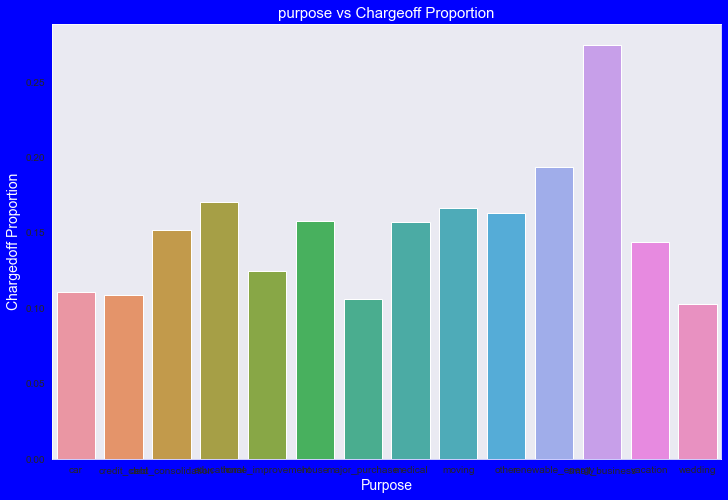

In [66]:
### Plotting graph for purpose

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('purpose vs Chargeoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Purpose',fontsize=14,color='w')
plt.show()



In [13]:
### Below are key inferences

#•	Annual income is directly proportionate to loan default. As maximum default is for people with salary less than $ 20 K and it goes down as the salary level goes up.
#•	People with no work experience are most likely to default
#•	People who are not owning house or having mortgage or not living on rent are most likely to default
#•	As ratio of debt to income(dti) increases people are most likely to default
# •	Its also observed that business loans are riskiest loans with almost 27 % defaulting. Credit appraisal process for business loans needs to be revisited.


In [ ]:
### End of the notebook